# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data / using libraries

In [667]:
# use these links to do so:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
dataset = pd.read_csv('Churn.csv')
print('total dataset size = {}'.format(dataset.shape))

total dataset size = (7043, 21)


target variable is "Churn".

### Understanding the data

In [668]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [669]:
dataset['PaymentMethod'].shape

(7043,)

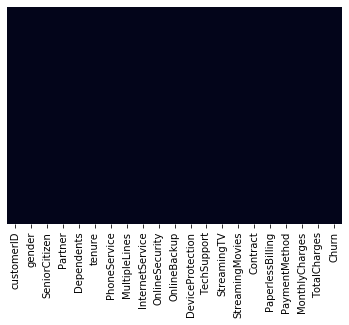

In [670]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [671]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


we can see "total charges" is in object datatype

In [672]:
dataset['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [673]:
#convert total charges into float datatype

dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors = 'coerce')

In [674]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [675]:
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [676]:
#found 11rows null values in Totalchareges
#filling missing values by its mean. as it a small value we can drop those rows,i prefer to fill by its mean.(will not effect the dataset)

dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean())


In [677]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [678]:
#droping customerId
#dividing features and target varibles.
dataset.drop(['customerID'],axis = 1,inplace = True)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [679]:
dataset.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


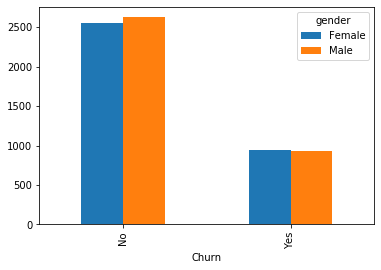

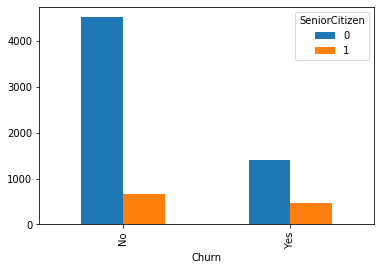

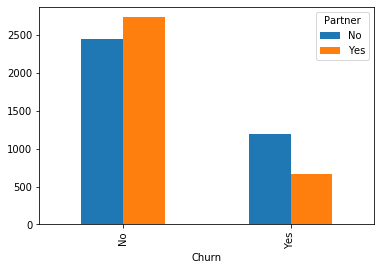

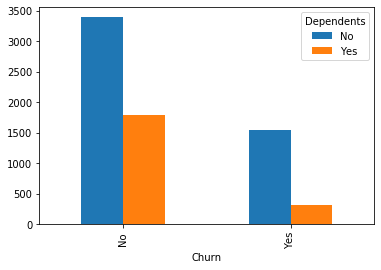

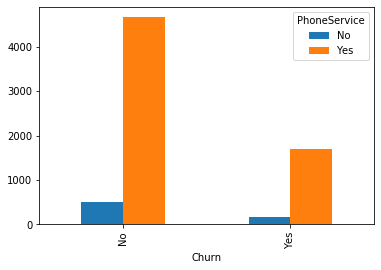

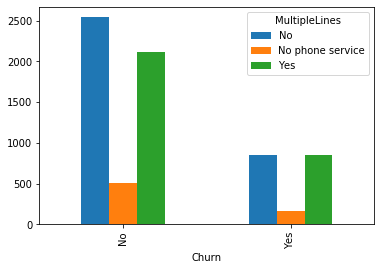

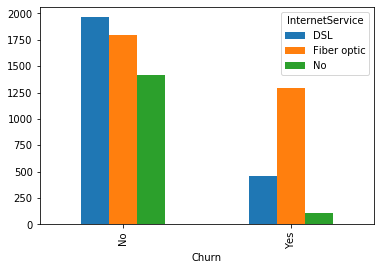

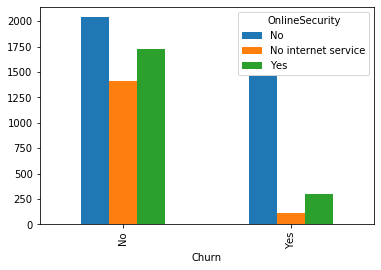

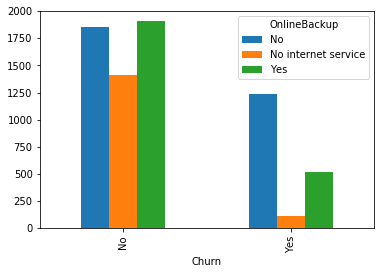

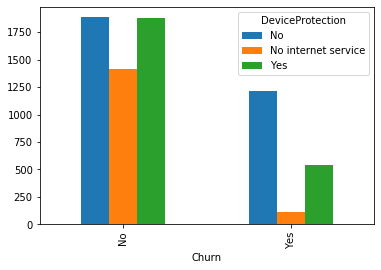

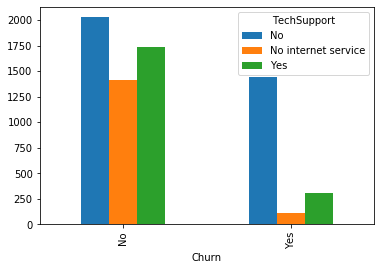

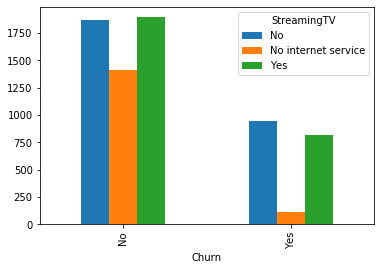

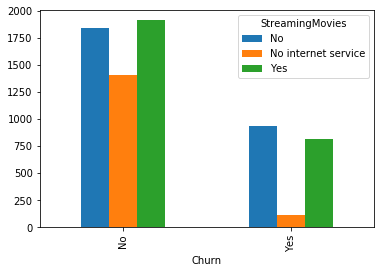

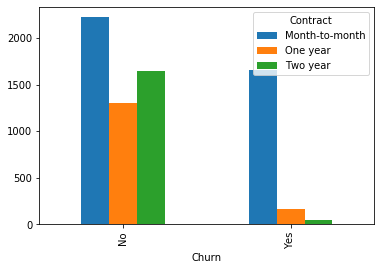

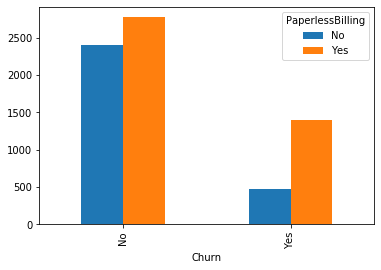

In [680]:
#data visualization

columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']

for i in range(0,15):
           df=dataset.groupby(['Churn',columns[i]]).size()
           df=df.unstack()
           df.plot(kind='bar')

In [681]:

#for i in range(0,15):
           #df=dataset.groupby(['Churn',columns[i]]).size()
           #df=df.unstack()
           #df.plot(kind='bar')

### Data Manipulation

In [682]:
#encoding catagorical data
#first encoding the target varible bu lable encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 1 ... 0 1 0]


In [683]:
#from the above visulizations we can see encoding catagorical data is very easy because many of those containging two catagories and few as three catagories.
#for two catagories we can do label encoder
#for three catagories we can do one hot encoding or orginal encoding as there 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),[0,2,3,5,6,7,8,9,10,11,12,13,14,15,16])],remainder='passthrough')
#ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),[2])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 0.0, ..., 1, 29.85, 29.85],
       [1.0, 0.0, 0.0, ..., 34, 56.95, 1889.5],
       [1.0, 0.0, 0.0, ..., 2, 53.85, 108.15],
       ...,
       [0.0, 1.0, 1.0, ..., 11, 29.6, 346.45],
       [1.0, 1.0, 0.0, ..., 4, 74.4, 306.6],
       [1.0, 0.0, 0.0, ..., 66, 105.65, 6844.5]], dtype=object)

In [684]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X = sc.fit_transform(X)


In [685]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [686]:
X_train

array([[ 0.99053183,  1.03453023,  1.5290241 , ..., -0.82952058,
        -1.49766771, -0.89408123],
       [-1.00955867, -0.96662231, -0.65401193, ...,  0.39209033,
         0.30372024,  0.3873341 ],
       [ 0.99053183,  1.03453023, -0.65401193, ...,  1.57298088,
         0.01290577,  1.05899319],
       ...,
       [ 0.99053183, -0.96662231, -0.65401193, ..., -0.17799476,
         1.36062313,  0.30739466],
       [ 0.99053183, -0.96662231, -0.65401193, ..., -1.23672422,
        -0.34438059, -0.95777228],
       [-1.00955867,  1.03453023,  1.5290241 , ..., -0.66663913,
         0.11593718, -0.51590873]])

### Data Visualization

In [687]:
#making analayis from given data

Churn_yes = dataset.loc[dataset['Churn'] == 'Yes']
Churn_yes

#own we had sorted who had Churn_yes / people who had stopped using campany produts



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [688]:
Churn_yes.shape

(1869, 20)

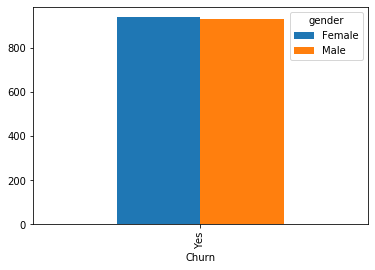

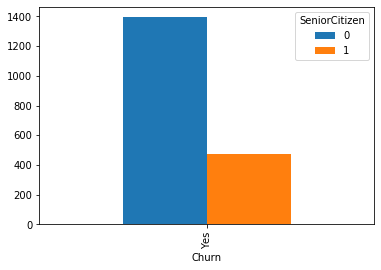

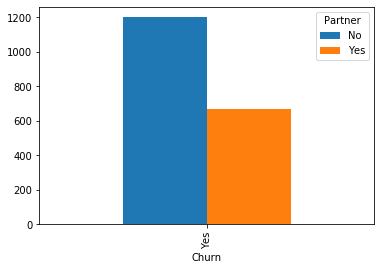

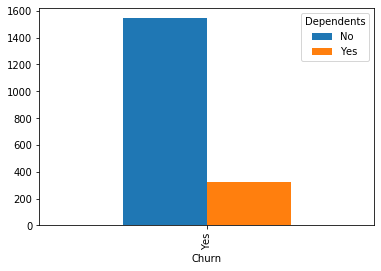

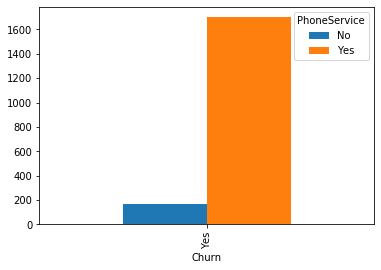

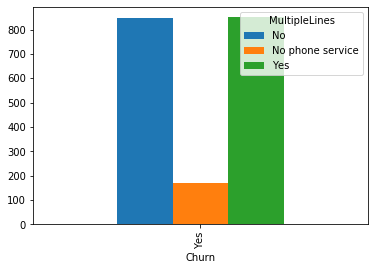

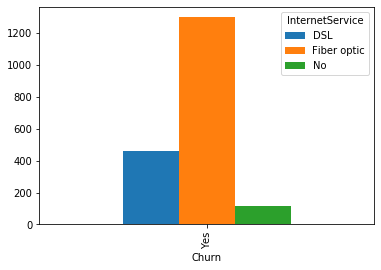

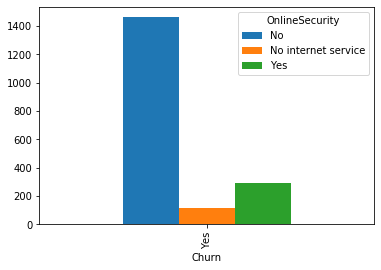

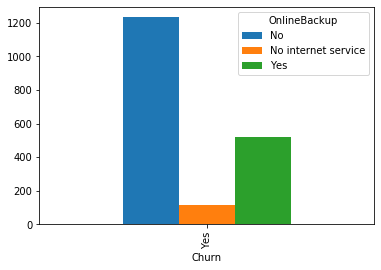

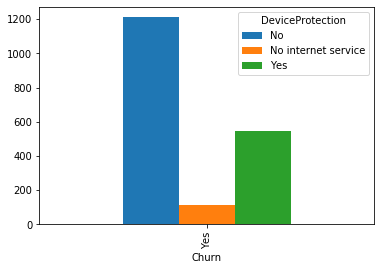

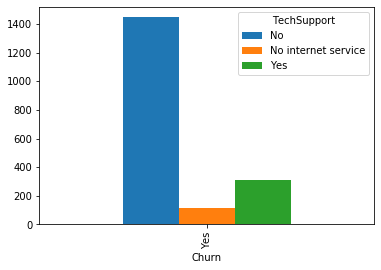

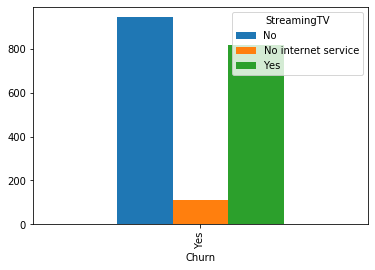

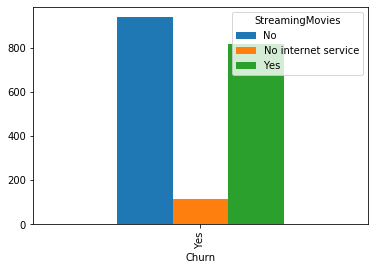

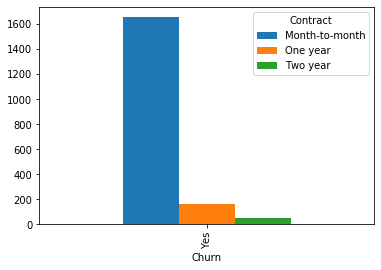

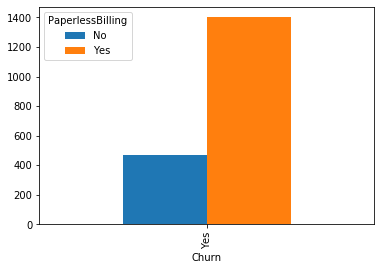

In [689]:
#data visualization 
for i in range(0,15):
           df=Churn_yes.groupby(['Churn',columns[i]]).size()
           df=df.unstack()
           df.plot(kind='bar')

analaysis made are:

1)one of the basic feature of a telecom company "internet service"
    - we can observe that customers with 'optical fiber' connections are churn their subcribtions,
      even optical fiber connection gives more speed than DSL connection still we can see Churn.
      
 

In [690]:


con1 = Churn_yes.loc[Churn_yes['InternetService']=='Fiber optic']
con1_a = con1.loc[Churn_yes['TechSupport']=='No'] 

In [691]:
#hear is the data who having fiber optic connection with no techsupport.
con1_a


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
26,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
36,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7018,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [692]:
### Conclusion: What all did you understand from the above chart


### Implement Machine Learning Models

In [693]:

#Logistic Regression 

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
lg_pred=classifier.predict(X_test)
print(accuracy_score(y_test,lg_pred))

0.808374733853797


In [694]:
## Hyper Parameters

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [695]:
#xgboosting alogorithm

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
xgb_model = xgb.XGBClassifier()
random_search=RandomizedSearchCV(xgb_model,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    2.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [696]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 12,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [697]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [698]:
xgb3 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1,monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb3.fit(X_train,y_train)
xgb_pred=xgb3.predict(X_test)
print(accuracy_score(y_test,xgb_pred))

0.8126330731014905


In [699]:
#kernal svm algorithm

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

#predicting
svm_pred = classifier.predict(X_test)
print(accuracy_score(y_test,svm_pred)*100)

80.97941802696948


In [700]:
#hyperparameter tuning to get best parameters.

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,X=X_train,y = y_train,cv= 15)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.16 %
Standard Deviation: 1.54 %


In [701]:
#applying grid search

from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.05,0.25,0.5,0.75,1],'kernel':['linear']},
             {'C':[0.05,0.25,0.5,0.75,1],'kernel':['rgf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV( estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 79.32 %
Best Parameters: {'C': 0.05, 'kernel': 'linear'}


In [702]:
#random forest algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RFC_pred = classifier.predict(X_test)
print(accuracy_score(y_test,RFC_pred))

0.78708303761533


In [703]:
#artifical neutral network

In [704]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10,kernel_initializer = 'he_normal', activation='relu'))
ann.add(tf.keras.layers.Dense(units=10,kernel_initializer = 'he_normal', activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer = 'glorot_normal',activation='sigmoid'))

In [705]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
282/282 [==============================] - 0s 824us/step - loss: 0.6515 - accuracy: 0.6383
Epoch 2/100
282/282 [==============================] - 0s 822us/step - loss: 0.4695 - accuracy: 0.7645
Epoch 3/100
282/282 [==============================] - 0s 806us/step - loss: 0.4482 - accuracy: 0.7812
Epoch 4/100
282/282 [==============================] - 0s 824us/step - loss: 0.4391 - accuracy: 0.7856
Epoch 5/100
282/282 [==============================] - 0s 794us/step - loss: 0.4338 - accuracy: 0.7861
Epoch 6/100
282/282 [==============================] - 0s 866us/step - loss: 0.4301 - accuracy: 0.7911
Epoch 7/100
282/282 [==============================] - 0s 774us/step - loss: 0.4277 - accuracy: 0.7930
Epoch 8/100
282/282 [==============================] - 0s 772us/step - loss: 0.4250 - accuracy: 0.7985
Epoch 9/100
282/282 [==============================] - 0s 828us/step - loss: 0.4238 - accuracy: 0.7982
Epoch 10/100
282/282 [==============================] - 0s 791us/step - l

282/282 [==============================] - 0s 751us/step - loss: 0.3954 - accuracy: 0.8142
Epoch 81/100
282/282 [==============================] - 0s 759us/step - loss: 0.3949 - accuracy: 0.8151
Epoch 82/100
282/282 [==============================] - 0s 691us/step - loss: 0.3944 - accuracy: 0.8172
Epoch 83/100
282/282 [==============================] - 0s 706us/step - loss: 0.3940 - accuracy: 0.8166
Epoch 84/100
282/282 [==============================] - 0s 772us/step - loss: 0.3941 - accuracy: 0.8161
Epoch 85/100
282/282 [==============================] - 0s 700us/step - loss: 0.3938 - accuracy: 0.8172
Epoch 86/100
282/282 [==============================] - 0s 741us/step - loss: 0.3945 - accuracy: 0.8179
Epoch 87/100
282/282 [==============================] - 0s 728us/step - loss: 0.3931 - accuracy: 0.8163
Epoch 88/100
282/282 [==============================] - 0s 697us/step - loss: 0.3935 - accuracy: 0.8145
Epoch 89/100
282/282 [==============================] - 0s 779us/step - loss:

In [706]:
ann_pred = ann.predict(X_test)
ann_pred = (ann_pred > 0.5)
print(accuracy_score(y_test,ann_pred))

0.8005677785663591


In [707]:
from keras.models import Sequential

In [708]:
#kernel pca model

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [709]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [710]:
kpca_pred = classifier.predict(X_test)
print(accuracy_score(y_test,kpca_pred))

0.7821149751596878


In [711]:
#naive_bayes algorithm


from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [712]:
naib_pred = classifier.predict(X_test)
print(accuracy_score(y_test,naib_pred))

0.7764371894960965


### Model Evaluation

In [713]:
#BEST PREDICTIONS
#1) USING xGBOOSTING  algorithm given me the good accuracy.


### Final Conclusions

In [717]:
#people who using fiber optic with no tech support are likely to Churn.
#similarly we can conclude that one factor depends on another by data visulalizing the data by differnt permutations.

# my model gives 81% of accuracy with logostic regression.

#CONCLUSIONS TO STOP CHURNING FROM COMPANY

#1) giveing tech support for customers
#2)to encougage customers to get internet connections.
#3) improving optical fiber connectivity.
#4) phone services are well, need to impore tech support.as seen customers with more services are Churning.

#5) we can observe "month-to-month" contract customers are Churns, it says that many customers are expermenting or trying our telecom services.
#    -we have to save the "month-to-month" contract customers by providing special ofters. anyway we have to make them stay.

#6) customers with NO "online backup" and "online security" are Churns. 
#    - have to give awareness about it make them to get online backups.


                                     thankyou hope, it will help you